Processing Precipitates Algorithm
==================

In this section a comprehensive explanation of the algorithm used to extract the properties of the precipitates from  outpu of the OkMC simulations is given. The main functions of this algorithm should be:

* Discriminate whenever a cell belongs to a precipitate, interface or matrix of the decomposed solid solution.
* Group the cells into the clusters which they belongs.
* Obtain the radius of the cluster
* Obtain the concentration of the cluster
* Obtain the total number of clusters in the sample

The implementation of the program has developed in Cpp and uses a Python interpreter to comunicate the user with the code.

1. Sweeps the sample and divide the cells into two groups: Above and below a concentration threshold value given by the user.
2. The group of cells with a concentration above the threshold is called 'Candidates'
3. While there are candidates in the 'Candidates' list we pick a candidate and look for its neighbors (6 neighbors in general)
4. We create a list with the neighbors with a concentration above the threshold value.
5. The cell picked in first place from the 'Candidates' list is then introduced into a cluster list.
6. While there is at least one neighbor within the list (if not then this cell forms itself a cluster of size 1 and move to step 3):
* A temporaly list is created with the neighbors of the current cell with concentration above the threshold value and which are not in the neighbors list.
* The cell is then moved into the cluster list and deleted from the neighbors and candidate lists.
* The cells of the temporary list are introduced into the neighbor list.

Step 6 builds each cluster while step 3 sweeps all the possible clusters. After this steps are performed we have a list of possible clusters which can be discriminated by size (p.e. neglect the clusters with size 1 (only one cell)).

For example, if we look at the following image, representing a slice of a simulation of FeCr$_{0.15}$  at 475$^\circ$C over 8·10$^7$s, we can notice that the Cr has segregated into $\alpha'$ clusters.

Number Density
----------------

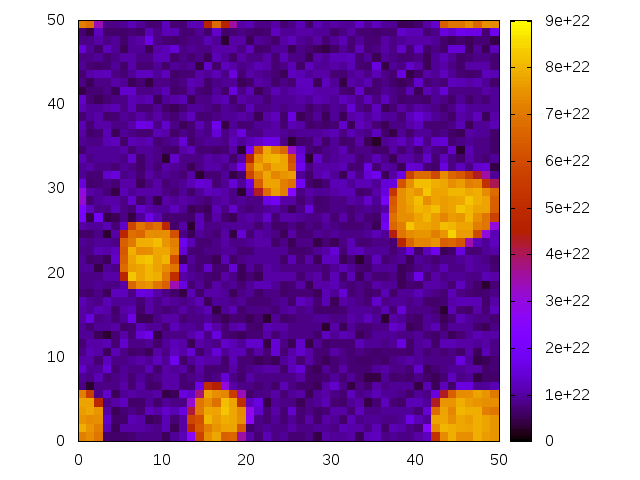

In [9]:
from IPython.display import Image 
Image(filename='/media/hd/Simulations/Chen/data/Sep_I_E5_Sf1_Big_Redux/8.0e+07.data.d/20.8.0e+07.data.png')                                                                             


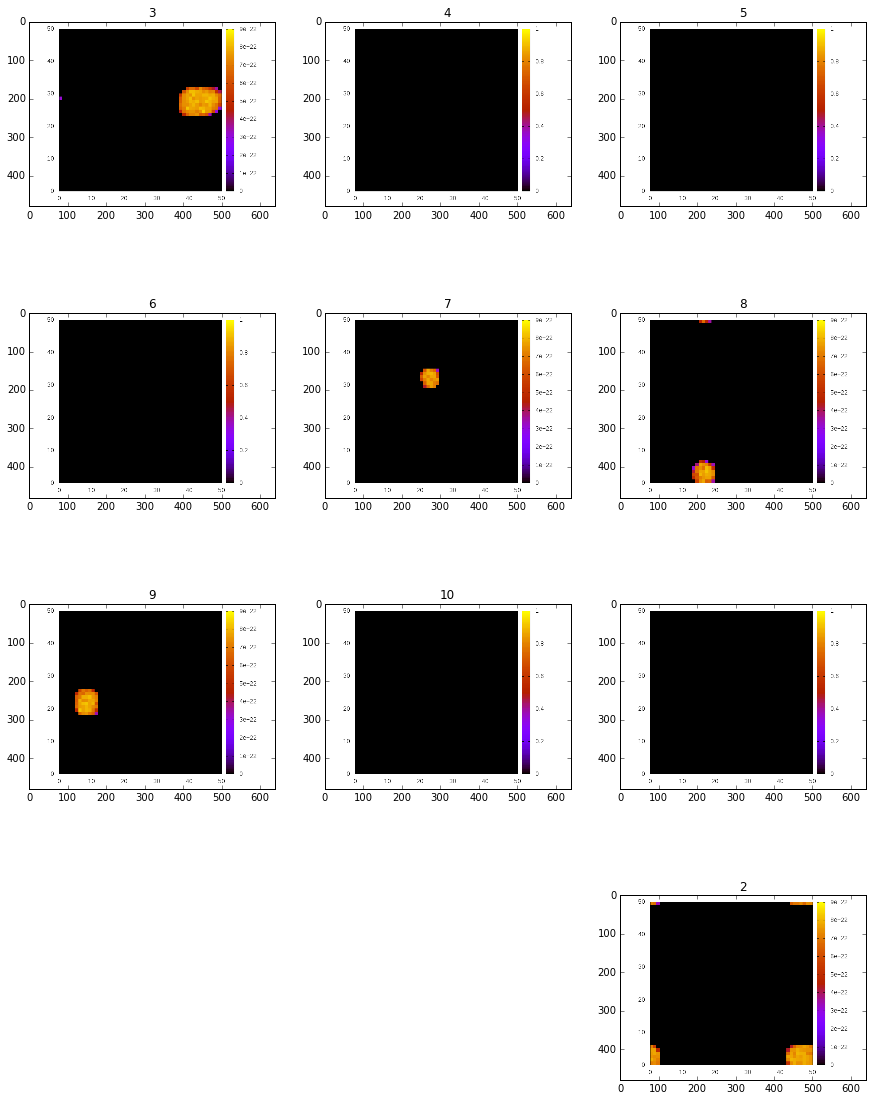

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 20.0)

path = "/media/hd/Simulations/Chen/data/Sep_I_E5_Sf1_Big_Redux/clusters5/clusters/8.0e+07/"
imgL = [str(x) + ".data.d/20." + str(x) + ".data.png" for x in range(1, 11)]

plt.figure(1)
for idx, imgP in enumerate(imgL):     
    img = mpimg.imread(path + imgP)  
    plt.title(imgP.split('.')[0])
    plt.subplot("43" + str(idx))    
    plt.imshow(img)

The simulation domain is about (50x50x20)nm$^3$ and 10 clusters were detected in the whole volume. This slice was taken at z = 20 nm where only 5 clusters were visible. It can be seen that the algorithm is capable of distinguish and isolate each individual cluster when they are well defined at the middle stage of nucleation. 



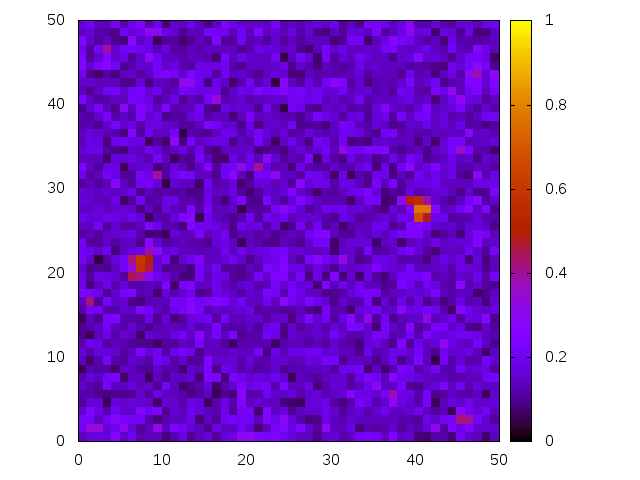

In [6]:
from IPython.display import Image 
Image(filename='/media/hd/Simulations/Chen/data/Sep_I_E5_Sf1_Big_Redux/2.3e+06.data.d/20.2.3e+06.data.png')   

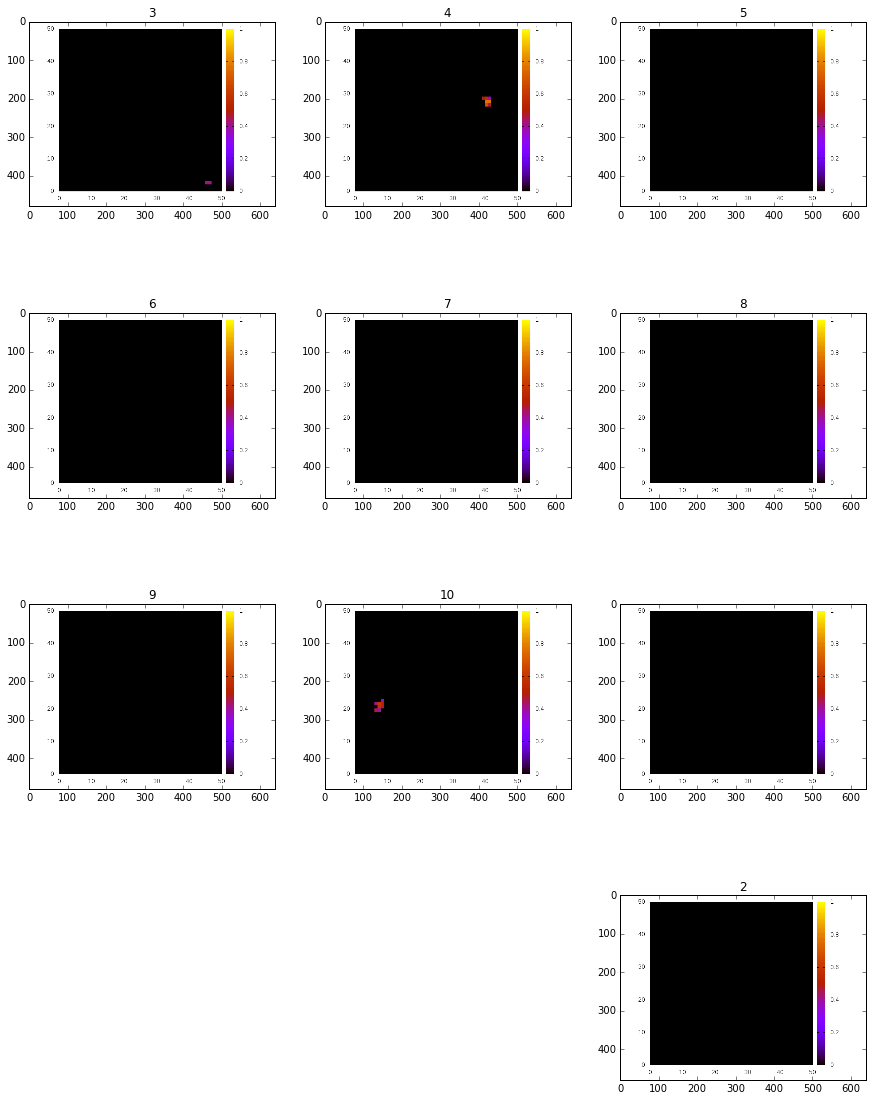

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 20.0)

path = "/media/hd/Simulations/Chen/data/Sep_I_E5_Sf1_Big_Redux/clusters5/clusters/2.3e+06/"
imgL = [str(x) + ".data.d/20." + str(x) + ".data.png" for x in range(1, 11)]

plt.figure(1)
for idx, imgP in enumerate(imgL):     
    img = mpimg.imread(path + imgP)
    plt.title(imgP.split('.')[0])
    plt.subplot("43" + str(idx))
    plt.imshow(img)  

Radius
-------


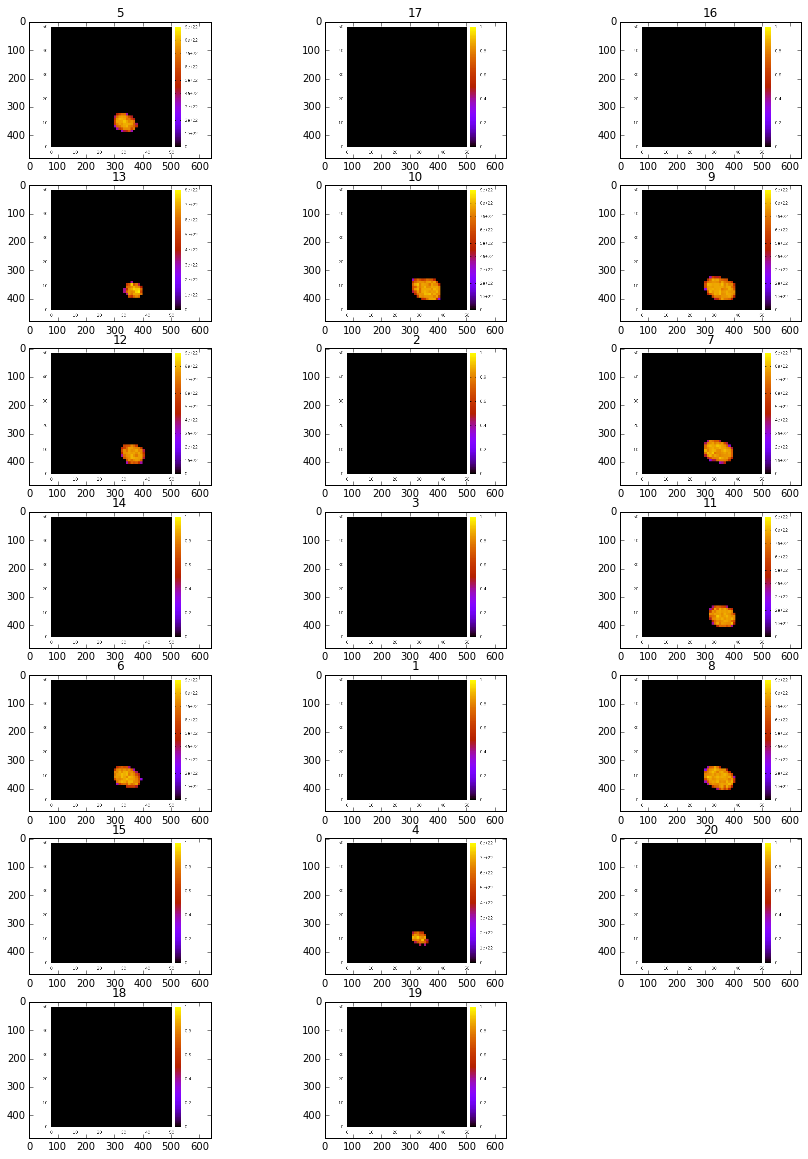

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import numpy as np
import pylab
import sys
import os

pylab.rcParams['figure.figsize'] = (15.0, 20.0)

path = "/media/hd/Simulations/Chen/data/Sep_I_E5_Sf1_Big_Redux/clusters5/clusters/8.0e+07/3.data.d/"
imgL = os.listdir(path)

rows = len(imgL) // 3 + 1
fig = plt.figure(1)
for idx, imgP in enumerate(imgL):     
    img = mpimg.imread(path + imgP)    
    fig.add_subplot(rows, 3, idx + 1)    
    plt.title(imgP.split('.')[0])
    plt.imshow(img)    